<a href="https://colab.research.google.com/github/VidyaValsalan/Prediction-with-DeepLearning/blob/master/LSTM-RL-Prediction/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from google.colab import files

In [2]:
uploaded = files.upload()

Saving excel_model_15.csv to excel_model_15.csv


In [3]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "excel_model_15.csv" with length 5019 bytes


In [11]:
import io
df1 = pd.read_csv(io.StringIO(uploaded['excel_model_15.csv'].decode('utf-8')),names=['date','4599','4291','5054','2157','4234','1018','22420','18494','19505','10215','11478','13223','16309','370'])
df1.head(5)
a=input('Enter the Location ID')

Enter the Location ID2157


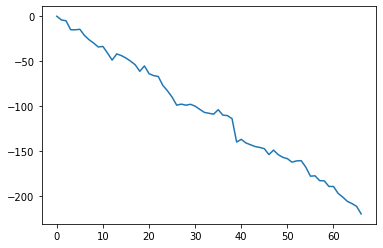

In [12]:
df1=df1.reset_index()[a]
df1.plot()
d=df1

In [13]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [14]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [15]:
import numpy
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [16]:
time_step = 4
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [17]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 4, 50)             10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 4, 50)             20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=800,batch_size=64,verbose=1)

Epoch 1/800
1/1 [==============================] - 0s 47ms/step - loss: 6.5564e-04 - val_loss: 3.8785e-04
Epoch 2/800
1/1 [==============================] - 0s 21ms/step - loss: 6.5558e-04 - val_loss: 3.9617e-04
Epoch 3/800
1/1 [==============================] - 0s 21ms/step - loss: 6.5515e-04 - val_loss: 3.9033e-04
Epoch 4/800
1/1 [==============================] - 0s 21ms/step - loss: 6.5466e-04 - val_loss: 3.9042e-04
Epoch 5/800
1/1 [==============================] - 0s 20ms/step - loss: 6.5442e-04 - val_loss: 3.9393e-04
Epoch 6/800
1/1 [==============================] - 0s 21ms/step - loss: 6.5440e-04 - val_loss: 3.8666e-04
Epoch 7/800
1/1 [==============================] - 0s 21ms/step - loss: 6.5433e-04 - val_loss: 3.9337e-04
Epoch 8/800
1/1 [==============================] - 0s 20ms/step - loss: 6.5405e-04 - val_loss: 3.8747e-04
Epoch 9/800
1/1 [==============================] - 0s 22ms/step - loss: 6.5367e-04 - val_loss: 3.8915e-04
Epoch 10/800
1/1 [============================

In [49]:
import tensorflow as tf
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [50]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.02469287655595585

In [51]:
math.sqrt(mean_squared_error(ytest,test_predict))

0.01657158009756254

In [52]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

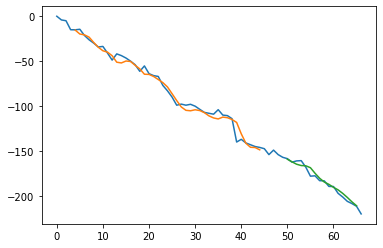

In [53]:
import matplotlib.pyplot as plt
look_back=4
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [54]:
len(test_data)

21

In [55]:
x_input=test_data[17:].reshape(1,-1)
x_input.shape

(1, 4)

In [56]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [57]:
#prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=4
i=0
while(i<60):
    
    if(len(temp_input)>4):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)


[0.00525727]
5
1 day input [0.05227273 0.03863636 0.         0.00525727]
1 day output [[-0.01269353]]
2 day input [ 0.03863636  0.          0.00525727 -0.01269353]
2 day output [[-0.02860071]]
3 day input [ 0.          0.00525727 -0.01269353 -0.02860071]
3 day output [[-0.04254851]]
4 day input [ 0.00525727 -0.01269353 -0.02860071 -0.04254851]
4 day output [[-0.05550961]]
5 day input [-0.01269353 -0.02860071 -0.04254851 -0.05550961]
5 day output [[-0.0707411]]
6 day input [-0.02860071 -0.04254851 -0.05550961 -0.0707411 ]
6 day output [[-0.08514152]]
7 day input [-0.04254851 -0.05550961 -0.0707411  -0.08514152]
7 day output [[-0.09942666]]
8 day input [-0.05550961 -0.0707411  -0.08514152 -0.09942666]
8 day output [[-0.11390939]]
9 day input [-0.0707411  -0.08514152 -0.09942666 -0.11390939]
9 day output [[-0.12850034]]
10 day input [-0.08514152 -0.09942666 -0.11390939 -0.12850034]
10 day output [[-0.14292201]]
11 day input [-0.09942666 -0.11390939 -0.12850034 -0.14292201]
11 day output [

In [59]:
day_new=np.arange(1,5)
day_pred=np.arange(5,65)

In [60]:
import matplotlib.pyplot as plt
len(df1)

67

In [61]:
df3=df1.tolist()
df3.extend(lst_output)

In [62]:
df3=scaler.inverse_transform(df3).tolist()

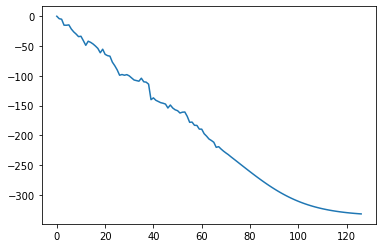

In [63]:
plt.plot(df3)

In [64]:
df3[67:127]

[[-218.84340012446046],
 [-222.79257576912642],
 [-226.2921552732587],
 [-229.36067327857018],
 [-232.21211463212967],
 [-235.5630424618721],
 [-238.7311354279518],
 [-241.87386453151703],
 [-245.06006494164467],
 [-248.2700753211975],
 [-251.44284307956696],
 [-254.61187690496445],
 [-257.7708727121353],
 [-260.9048357605934],
 [-264.00684893131256],
 [-267.0759615302086],
 [-270.10362058877945],
 [-273.0826336145401],
 [-276.0078078508377],
 [-278.8736915588379],
 [-281.674285531044],
 [-284.4046527147293],
 [-287.06034779548645],
 [-289.6372991800308],
 [-292.1318221092224],
 [-294.54112350940704],
 [-296.8627643585205],
 [-299.0949350595474],
 [-301.2364947795868],
 [-303.28672230243683],
 [-305.2455586194992],
 [-307.1133315563202],
 [-308.8909721374512],
 [-310.57967364788055],
 [-312.18112111091614],
 [-313.69729459285736],
 [-315.13042986392975],
 [-316.48305118083954],
 [-317.7578401565552],
 [-318.95762264728546],
 [-320.0854015350342],
 [-321.1441797018051],
 [-322.137045264

In [91]:
#finding Collapse
y = numpy.hstack(df3)
k=0
c=[]
m=[]
for i in range(67,127):
    if y[i-1]-y[i] >3 :
        c.insert(k,y[i])
        m.insert(k,i)
        k=k+1
c

[-222.79257576912642,
 -226.2921552732587,
 -229.36067327857018,
 -235.5630424618721,
 -238.7311354279518,
 -241.87386453151703,
 -245.06006494164467,
 -248.2700753211975,
 -251.44284307956696,
 -254.61187690496445,
 -257.7708727121353,
 -260.9048357605934,
 -264.00684893131256,
 -267.0759615302086,
 -270.10362058877945]

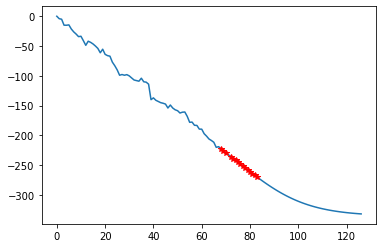

In [92]:
#Highlighting points possible for collapse
x=list(range(0,127))
x=np.array(x)
plt.plot(x,y)
plt.plot(m,c,'r*')